# RL Workshop
Ian Tsybulkin

May 2019

## 0. Plan

- Preparing your working environment
- Introduction
- RL model
- Gym: Ready to go Environments from Open AI
- Developing RL-Agent
- Temporal Learning, Q-learning
- Practice
- Students demos and Summary


## 1. Preparation
### Libraries
We will need some generic libraries:
- Numpy
- matplotlib

and a librirary that contains many different enironments (worlds) from Open AI:
- gym ( https://gym.openai.com/docs/#environments )


## 2. RL Model
![Model](imgs/model.png "Model")


Let us create some of the Open AI's environments.

###  Environment: CartPole

In [1]:
import matplotlib.pyplot as plt
import gym

env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/ian/anaconda2/envs/net/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [6]:
env.reset()
env.render()

True

In [7]:
env.close()

In [4]:
env.reset()

array([-0.01222032,  0.01030183, -0.04241242, -0.0070259 ])

This is a state of the environment after its initialization.

In [5]:
print("Rewards:", env.reward_range)
print("Action space:",env.action_space)
print("State space:",env.observation_space)


Rewards: (-inf, inf)
Action space: Discrete(2)
State space: Box(4,)


In [20]:
env.action_space.sample()

0

In [21]:
env.step(0)

(array([ 0.02515105, -0.24072395,  0.04556493,  0.32881877]), 1.0, False, {})

The main loop:

(state, reward, is_terminal, info) = **env.step** (action)


Let us create a simple episode:

In [11]:
is_terminal = False

while not is_terminal:
    action = env.action_space.sample()
    state, reward, is_terminal, _ = env.step(action)
    print(state, reward)

[ 0.17015179  0.97646745 -0.33090734 -1.95295801] 0.0


###  Environment: MountainCarContinous

In [13]:
env = gym.make('MountainCar-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [14]:
env.action_space

Discrete(3)

In [15]:
env.observation_space

Box(2,)

And now let us simulate 5 episodes and look at what we will get.

In [16]:
episodes = []
for _ in range(5):
    states = []
    states.append(env.reset())
    
    done = False
    i = 0
    while not done and i < 50:
        i += 1
        action = env.action_space.sample()
        state,_,done,_ = env.step(action)
        states.append(state)
    episodes.append(states[:])
    
env.close()

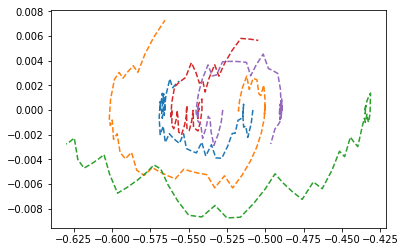

In [27]:
for states in episodes:
    x,y = zip(*states)
    plt.plot(x,y,'--')
    
plt.show()



## Agent

In [17]:
env = gym.make('MountainCar-v0')
env.action_space
import time

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [18]:
done = False
env.reset()
for _ in range(100):
    env.render()
    time.sleep(0.05)
    env.step(0)

env.close()

let us create an agent

In [19]:
env = gym.make('MountainCar-v0')
_,v = env.reset()

done = False
i = 0
while not done and i < 1000:
    env.render()
    i += 1
    time.sleep(0.1)
    if v > 0:
        action = 2
    else:
        action = 0
    (_,v),_,done,_ = env.step(action)

env.close()
print(i)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
160
